In [91]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 1000)

In [81]:
# Load data
data = pickle.load(open('data/clean.pkl', 'rb'))

In [82]:
# Eliminate absence where time > 8 hours
data = data[data['Absenteeism'] <= 8]

In [83]:
# Add Year
months = (data.shift() != data)['Month of absence'].cumsum()
data['Year of absence'] = 2007
data.loc[months >= 7, 'Year of absence'] = 2008
data.loc[months >= 19, 'Year of absence'] = 2009
data.loc[months >= 31, 'Year of absence'] = 2010

In [84]:
# Add Numerical Month
mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
data['Numerical Month'] = data['Month of absence'].replace(mapping)

In [85]:
# Add Year + Month
data['Time'] = data['Year of absence'].astype(str) + '-' + data['Numerical Month'].astype(str)

In [97]:
# Creates Time Series
absence_time = data.groupby('Time')['Absenteeism'].sum()
absence_number = data.groupby('Time')['Absenteeism'].count()

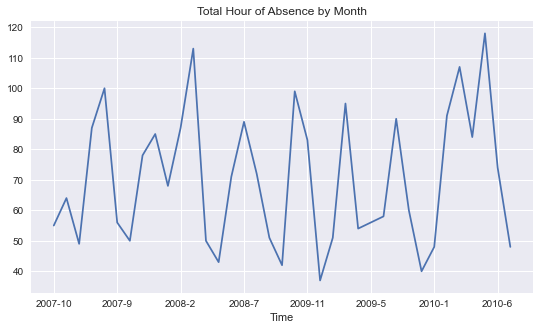

In [96]:
# Plot Absence Time
plt.figure(figsize=(9, 5))
absence_time.plot()
plt.title('Total Hour of Absence by Month')
plt.plot();

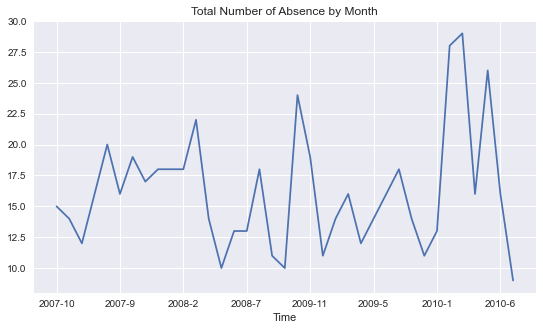

In [98]:
# Plot Absence Number
plt.figure(figsize=(9, 5))
absence_number.plot()
plt.title('Total Number of Absence by Month')
plt.plot();